In [8]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [9]:
# Imports
import sys
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [10]:
np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [11]:
%matplotlib inline

In [12]:
# Retrieve inputs
%store -r X_motion_01
%store -r X_motion_02
%store -r X_motion_03
%store -r X_motion_04
%store -r X_motion_05
%store -r X_motion_06
%store -r X_motion_07
%store -r X_motion_08
%store -r X_motion_09

# Retrieve labels
%store -r Y_motion_01
%store -r Y_motion_02
%store -r Y_motion_03
%store -r Y_motion_04
%store -r Y_motion_05
%store -r Y_motion_06
%store -r Y_motion_07
%store -r Y_motion_08
%store -r Y_motion_09

In [13]:
print(X_motion_01.shape)
print(X_motion_02.shape)
print(X_motion_03.shape)
print(X_motion_04.shape)
print(X_motion_05.shape)
print(X_motion_06.shape)
print(X_motion_07.shape)
print(X_motion_08.shape)
print(X_motion_09.shape)

(698, 18)
(674, 18)
(627, 18)
(636, 18)
(580, 18)
(587, 18)
(632, 18)
(536, 18)
(738, 18)


In [14]:
print(Y_motion_01.shape)
print(Y_motion_02.shape)
print(Y_motion_03.shape)
print(Y_motion_04.shape)
print(Y_motion_05.shape)
print(Y_motion_06.shape)
print(Y_motion_07.shape)
print(Y_motion_08.shape)
print(Y_motion_09.shape)

(698, 12)
(674, 12)
(627, 12)
(636, 12)
(580, 12)
(587, 12)
(632, 12)
(536, 12)
(738, 12)


In [15]:
X_motions = np.concatenate((X_motion_01, X_motion_02, X_motion_03, X_motion_04))
print(X_motions.shape)

(2635, 18)


In [16]:
Y_motions = np.concatenate((Y_motion_01, Y_motion_02, Y_motion_03, Y_motion_04))
print(Y_motions.shape)

(2635, 12)


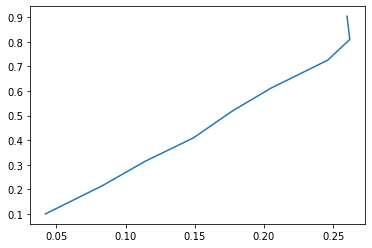

In [17]:
plt.plot([0.042, 0.083, 0.114, 0.149, 0.177, 0.205, 0.246, 0.262, 0.260], [0.1, 0.214359, 0.313843, 0.409412, 0.518221, 0.611591, 0.725299, 0.809811, 0.904171])

# Multivariate Linear Regression (Foot prediction)

The input will use initially only:

- **HighCmd: fwd, side, rot speeds**
- **HighState: fwd, side, rot speeds, footPosition2Body (FR)**

and as output we seek to predict the following:

- **footPosition2Body (FR)**

In [114]:
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [115]:
def plot_target_and_predictions(title: str, predictions, target):
    fig, ax1 = plt.subplots(1,1, figsize=(15,10))
    fig.suptitle(title)
    
    # FR plot (height)
    ax1.plot(range(predictions.shape[0]), predictions, 'b-')
    ax1.set_ylabel('Predictions')
    ax1.set_xlabel('Time')
         
    # FR plot (force)
    ax2 = ax1.twinx()
    ax2.plot(range(predictions.shape[0]), target, 'g-')
    ax2.set_ylabel('Target', color='g')

    for tl in ax2.get_yticklabels():
        tl.set_color('g')
    
    fig.tight_layout()
    plt.show()

## Predict FR foot (x,y,z)

In [116]:
X_motions[1, :]

array([ 0.1       ,  0.        ,  0.        ,  0.218044  , -0.00145623,
        0.0386209 ,  0.199     , -0.143     , -0.413     ,  0.254     ,
        0.153     , -0.4       , -0.225     , -0.11      , -0.416     ,
       -0.273     ,  0.142     , -0.412     ])

In [214]:
Y_motions[1, :]

array([ 0.261, -0.115, -0.412,  0.206,  0.133, -0.403, -0.273, -0.124,
       -0.415, -0.22 ,  0.15 , -0.409])

In [298]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], X_motions[:, 6:9], X_motions[:, 9:12]))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = Y_motions[:, :3]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Create the model
model_fr_full = LinearRegression()

# Fit the model
model_fr_full.fit(X_train, Y_train)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The highest error is: ", np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The avg. error is: ", np.mean(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)
print("Seq of errors (descendant): \n", sorted(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1).tolist(), reverse=True))

Input shape:  (5708, 12)
Labels shape:  (5708, 3)
Predictions shape:  (571, 3)
The lowest error is:  0.00022675553389161848
The highest error is:  0.20494677908420011
The avg. error is:  0.017490669034638525
The mean squared avg. error between the prediction and groundtruth is:  0.0006857777361129813
Seq of errors (descendant): 
 [0.20494677908420011, 0.18019553556080747, 0.15356106101062128, 0.14919070944656115, 0.14854735432253277, 0.1338891334170173, 0.09249748959150085, 0.08516576309672923, 0.08304651273549568, 0.077485145599741, 0.07135010775290355, 0.06705550926917246, 0.06677388194234812, 0.06628348253281742, 0.05881881477491077, 0.05834280888608706, 0.05754930787824227, 0.05629671700131238, 0.05330691190572847, 0.04753922250882533, 0.047502905120502724, 0.04590977921459595, 0.04459697661020674, 0.04375491175909919, 0.04298882143926188, 0.042808751855860985, 0.04270195890834548, 0.041837618308350796, 0.041730391609256345, 0.0399466697923653, 0.03914079111933067, 0.03898516652969

In [302]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], X_motions[:, 6:9], X_motions[:, 9:12]))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = Y_motions[:, :3]
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

# Predict
predictions = model_fr_full.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The highest error is: ", np.max(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The avg. error is: ", np.mean(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)
print("Seq of errors (descendant): \n", sorted(np.linalg.norm(predictions[:, :-1] - Y_test[:, :-1], axis=1).tolist(), reverse=True))

Input shape:  (2635, 12)
Labels shape:  (2635, 3)
Predictions shape:  (264, 3)
The lowest error is:  0.0005303272840636429
The highest error is:  0.08529463281929013
The avg. error is:  0.01130873673645183
The mean squared avg. error between the prediction and groundtruth is:  0.00024162918818458316
Seq of errors (descendant): 
 [0.08529463281929013, 0.07841115779788035, 0.07071237861775707, 0.05561630041693262, 0.054436359931815975, 0.05410508017004183, 0.04366663001711414, 0.038912084905568405, 0.03855439946348108, 0.032877885501244375, 0.025249525380965216, 0.024706365573508544, 0.023029506814818333, 0.02188837493844413, 0.021599734153841803, 0.020579807583750234, 0.019374326721664805, 0.019215423269903824, 0.018907730030041085, 0.018331754288493506, 0.018143672840950593, 0.018076381176043755, 0.017680380949690808, 0.017060613531915726, 0.0170132604258098, 0.01698975446484561, 0.016877698768516122, 0.0166217099851886, 0.01628482189528243, 0.016278501860489517, 0.015984392222072305, 

In [297]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6:9]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: [ 0.248 -0.108 -0.411]. Groundtruth: [ 0.237 -0.125 -0.409]. Predicted: [ 0.24347477 -0.12753974 -0.40937615]
Start: [ 0.161 -0.122 -0.419]. Groundtruth: [ 0.263 -0.154 -0.418]. Predicted: [ 0.27571445 -0.15046353 -0.41473934]
Start: [ 0.241 -0.151 -0.394]. Groundtruth: [ 0.24  -0.128 -0.413]. Predicted: [ 0.2439948  -0.05676181 -0.40370388]
Start: [ 0.261 -0.139 -0.417]. Groundtruth: [ 0.174 -0.12  -0.42 ]. Predicted: [ 0.18909828 -0.12261767 -0.41811812]
Start: [ 0.254 -0.141 -0.416]. Groundtruth: [ 0.19  -0.113 -0.42 ]. Predicted: [ 0.2031992  -0.11609825 -0.41747788]
Start: [ 0.246 -0.146 -0.402]. Groundtruth: [ 0.23  -0.109 -0.409]. Predicted: [ 0.23668047 -0.12967399 -0.40479117]
Start: [ 0.206 -0.111 -0.419]. Groundtruth: [ 0.249 -0.143 -0.415]. Predicted: [ 0.24208282 -0.14589162 -0.41380399]
Start: [ 0.227 -0.145 -0.395]. Groundtruth: [ 0.275 -0.053 -0.406]. Predicted: [ 0.24440055 -0.0652907  -0.40183834]
Start: [ 0.244 -0.142 -0.408]. Groundtruth: [ 0.232 -0.136 -0.41

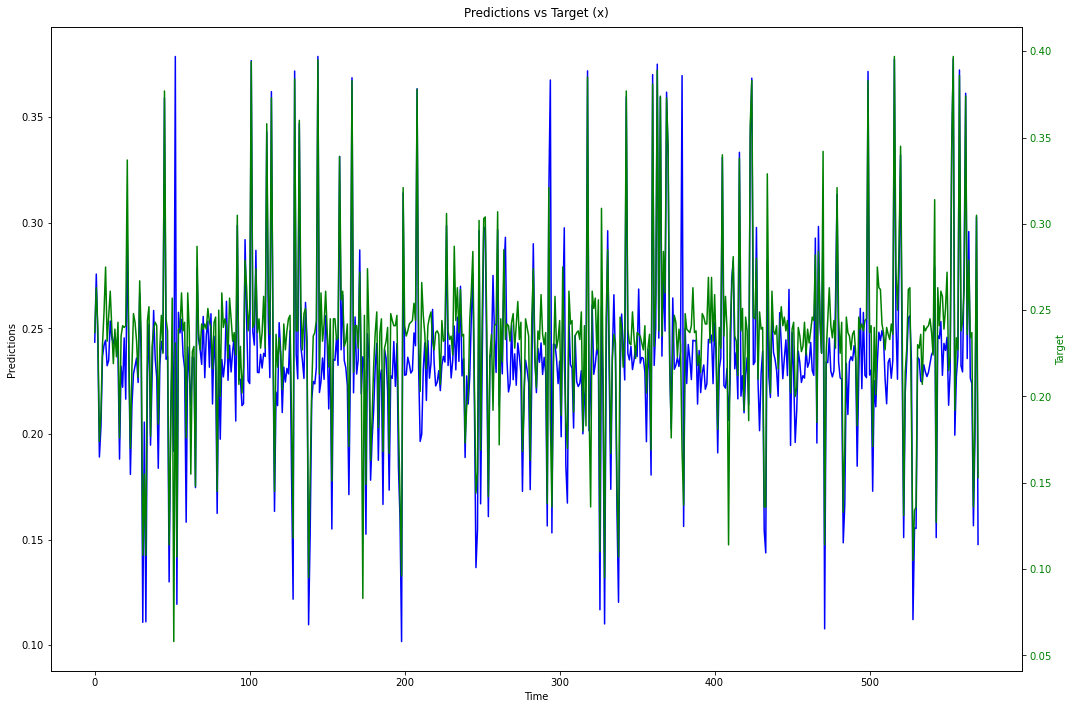

In [258]:
plot_target_and_predictions("Predictions vs Target (x)", predictions[:, 0], Y_test[:, 0])

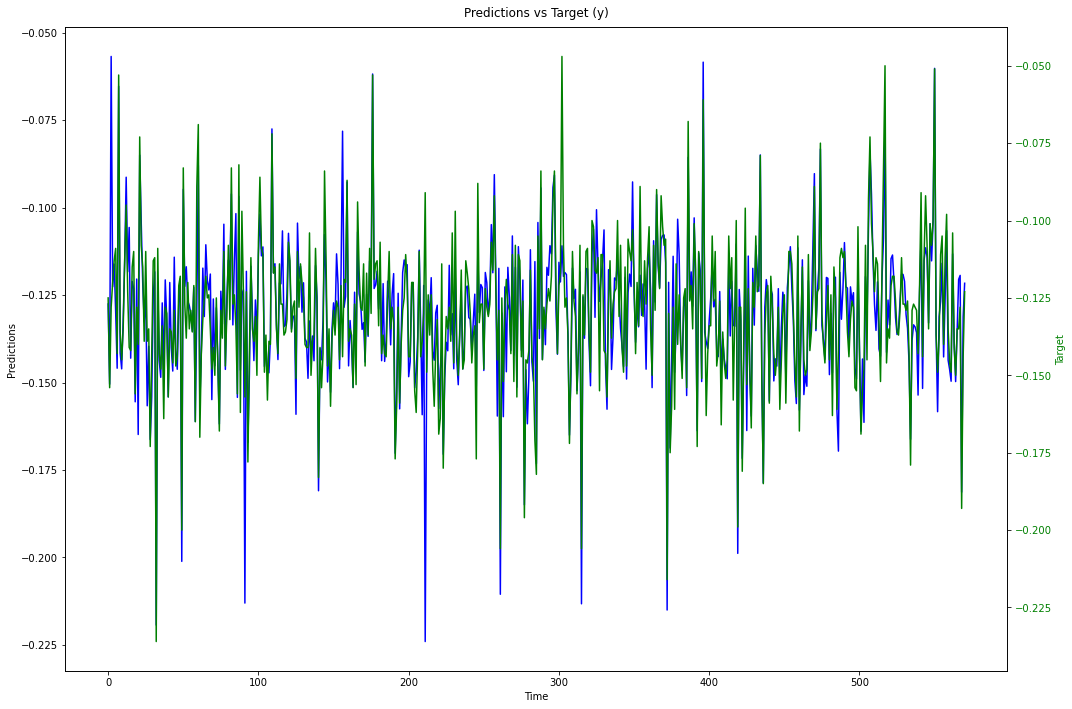

In [259]:
plot_target_and_predictions("Predictions vs Target (y)", predictions[:, 1], Y_test[:, 1])

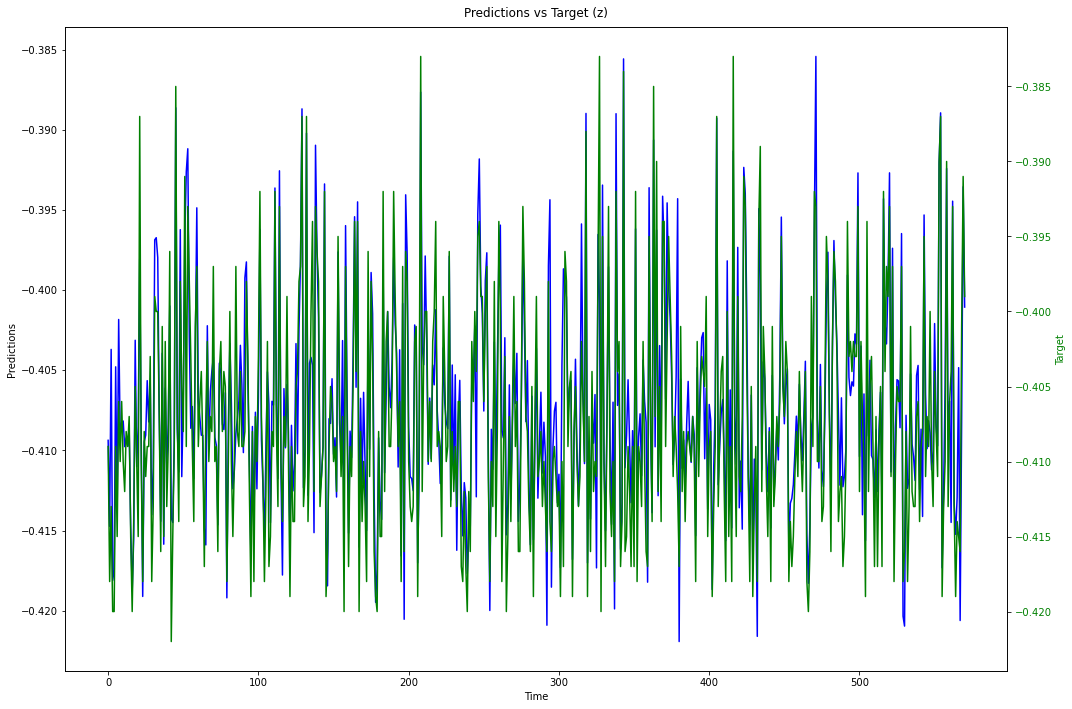

In [260]:
plot_target_and_predictions("Predictions vs Target (z)", predictions[:, 2], Y_test[:, 2])

### Predict FR foot -> x

In [280]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 6]]).T, np.array([X_motions[:, 9]]).T))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 0]]).T
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)

# Create the model
model_fr_x = LinearRegression()
model_fr_x.fit(X_train, Y_train)

# Fit the model
model_fr_x.fit(X_train, Y_train)

# Predict
predictions = model_fr_x.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

Input shape:  (5708, 8)
Labels shape:  (5708, 1)
Predictions shape:  (571, 1)
The lowest error is:  2.1816424758402952e-07
The highest error is:  0.13640896999564164
The avg. error is:  0.013059429159904958
The mean squared avg. error between the prediction and groundtruth is:  0.0004000349722101398


In [281]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: 0.29. Groundtruth: [0.203]. Predicted: [0.19496755]
Start: 0.24. Groundtruth: [0.225]. Predicted: [0.2482445]
Start: 0.241. Groundtruth: [0.24]. Predicted: [0.24099258]
Start: 0.257. Groundtruth: [0.238]. Predicted: [0.25878685]
Start: 0.241. Groundtruth: [0.239]. Predicted: [0.24206699]
Start: 0.243. Groundtruth: [0.244]. Predicted: [0.24142266]
Start: 0.201. Groundtruth: [0.285]. Predicted: [0.27407766]
Start: 0.388. Groundtruth: [0.109]. Predicted: [0.11771423]
Start: 0.241. Groundtruth: [0.233]. Predicted: [0.23303071]
Start: 0.214. Groundtruth: [0.244]. Predicted: [0.24325214]
Start: 0.244. Groundtruth: [0.229]. Predicted: [0.23237907]
Start: 0.291. Groundtruth: [0.158]. Predicted: [0.16555703]
Start: 0.255. Groundtruth: [0.241]. Predicted: [0.25671215]
Start: 0.272. Groundtruth: [0.152]. Predicted: [0.1737635]
Start: 0.305. Groundtruth: [0.182]. Predicted: [0.17921047]
Start: 0.165. Groundtruth: [0.263]. Predicted: [0.27313919]
Start: 0.24. Groundtruth: [0.243]. Predicted:

### Predict FR foot -> y

In [282]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 7]]).T, np.array([X_motions[:, 10]]).T))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 1]]).T
print("Labels shape: ", Y.shape)
# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_y = LinearRegression()

# Fit the model
model_fr_y.fit(X_train, Y_train)

# Predict
predictions = model_fr_y.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (5708, 8)
Labels shape:  (5708, 1)
Predictions shape:  (571, 1)
The lowest error is:  3.729891028392274e-05
The highest error is:  0.14100707072591398
The avg. error is:  0.009343590856089193
The mean squared avg. error between the prediction and groundtruth is:  0.00020015820769913906


In [283]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.108. Groundtruth: [-0.125]. Predicted: [-0.1229694]
Start: -0.122. Groundtruth: [-0.154]. Predicted: [-0.14741115]
Start: -0.151. Groundtruth: [-0.128]. Predicted: [-0.06970267]
Start: -0.139. Groundtruth: [-0.12]. Predicted: [-0.12642777]
Start: -0.141. Groundtruth: [-0.113]. Predicted: [-0.1235461]
Start: -0.146. Groundtruth: [-0.109]. Predicted: [-0.12880161]
Start: -0.111. Groundtruth: [-0.143]. Predicted: [-0.14388056]
Start: -0.145. Groundtruth: [-0.053]. Predicted: [-0.07376628]
Start: -0.142. Groundtruth: [-0.136]. Predicted: [-0.12826718]
Start: -0.135. Groundtruth: [-0.145]. Predicted: [-0.13501087]
Start: -0.136. Groundtruth: [-0.135]. Predicted: [-0.12700789]
Start: -0.161. Groundtruth: [-0.113]. Predicted: [-0.11248298]
Start: -0.165. Groundtruth: [-0.095]. Predicted: [-0.09463461]
Start: -0.109. Groundtruth: [-0.123]. Predicted: [-0.1189381]
Start: -0.164. Groundtruth: [-0.141]. Predicted: [-0.10898606]
Start: -0.116. Groundtruth: [-0.142]. Predicted: [-0.137332

### Predict FR foot -> z

In [284]:
# Stack motion command, velocity state, 
# and foot x coordinate in order to 
# create the input matrix. We dont consider
# the last row.
X = np.hstack((X_motions[:, :3], X_motions[:, 3:6], np.array([X_motions[:, 8]]).T, np.array([X_motions[:, 11]]).T))
print("Input shape: ", X.shape)

# Label matrix which consists only of
# the next x coordinate of the FR foot.
# We dont consider the first row.
Y = np.array([Y_motions[:, 2]]).T
print("Labels shape: ", Y.shape)

# Make sure we have the same
# number of rows for both labels
# and input
assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.10, random_state=42)

# Create the model
model_fr_z = LinearRegression()

# Fit the model
model_fr_z.fit(X_train, Y_train)

# Predict
predictions = model_fr_z.predict(X_test)
print("Predictions shape: ", predictions.shape)

# Compute MSE
mse = np.sum((predictions - Y_test)**2) / predictions.shape[0]

# MSE stats
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
print("The mean squared avg. error between the prediction and groundtruth is: ", mse)

Input shape:  (5708, 8)
Labels shape:  (5708, 1)
Predictions shape:  (571, 1)
The lowest error is:  1.561785129450266e-05
The highest error is:  0.01915562697334361
The avg. error is:  0.003452700048854678
The mean squared avg. error between the prediction and groundtruth is:  2.0355991658071086e-05


In [285]:
for idx, prediction in enumerate(predictions):
    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

Start: -0.411. Groundtruth: [-0.409]. Predicted: [-0.40937183]
Start: -0.419. Groundtruth: [-0.418]. Predicted: [-0.41743031]
Start: -0.394. Groundtruth: [-0.413]. Predicted: [-0.40161863]
Start: -0.417. Groundtruth: [-0.42]. Predicted: [-0.41809146]
Start: -0.416. Groundtruth: [-0.42]. Predicted: [-0.41595063]
Start: -0.402. Groundtruth: [-0.409]. Predicted: [-0.40434285]
Start: -0.419. Groundtruth: [-0.415]. Predicted: [-0.4148751]
Start: -0.395. Groundtruth: [-0.406]. Predicted: [-0.40218777]
Start: -0.408. Groundtruth: [-0.41]. Predicted: [-0.4080026]
Start: -0.409. Groundtruth: [-0.406]. Predicted: [-0.40866708]
Start: -0.409. Groundtruth: [-0.41]. Predicted: [-0.40630921]
Start: -0.403. Groundtruth: [-0.412]. Predicted: [-0.40681337]
Start: -0.399. Groundtruth: [-0.408]. Predicted: [-0.40342498]
Start: -0.41. Groundtruth: [-0.409]. Predicted: [-0.40864295]
Start: -0.403. Groundtruth: [-0.407]. Predicted: [-0.40644194]
Start: -0.419. Groundtruth: [-0.415]. Predicted: [-0.41482957]